# Normal Distributions

In [1]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### One Dimensional Normal PDF

In [23]:
def normalpdf_1d(X,mean,var):
    # X can be float or numpy array
    return np.exp(-0.5*np.square(X-mean)/var)/np.sqrt(2*np.pi*var)

### Plot

In [24]:
# create data for 1d normal probability distribution
npoint = 100
X = np.linspace(-5,5,npoint)
Z1 = normalpdf_1d(X,0,1)
Z2 = normalpdf_1d(X,0.5,4)
Z3 = normalpdf_1d(X,-1,0.25)

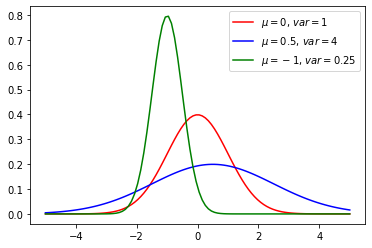

In [25]:
# plot pdf
plt.figure()
plt.plot(X,Z1,"r-",label="$\mu=0$, $var=1$")
plt.plot(X,Z2,"b-",label="$\mu=0.5$, $var=4$")
plt.plot(X,Z3,"g-", label="$\mu=-1$, $var=0.25$")
plt.legend()

### Multi-dimensional Normal PDF

In [5]:
def normalpdf(X,mean,Sigma):
    # X is 2d array with d rows and nsample columns
    # mean is 2d array d rows and 1 column
    # Sigma covariance matrix is 2d array with d rows and d columns 
    # Z ouptut (1 row and nsample columns) is normal pdf
    d,nsample = X.shape
    Z = np.zeros((1,nsample))
    invSigma = np.linalg.inv(Sigma)
    detSigma = np.linalg.det(Sigma)
    for i in range(nsample):
        Z[0,i] = np.exp(-0.5*np.dot((X[:,[i]]-mean).T,np.matmul(invSigma,X[:,[i]]-mean)))/np.sqrt(np.power(2*np.pi,d)*detSigma)
    return Z

### Surface Plot

In [39]:
# create gridpoints in x0-x1 plane
npoint = 25
x0max = 5.5
x0min = -4.5
x1max = 5.5
x1min = -4.5
X0grid,X1grid = np.meshgrid(np.linspace(x0min,x0max,npoint),np.linspace(x1min,x1max,npoint))

Text(0, 0.5, 'x1')

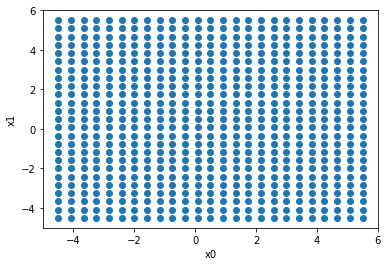

In [40]:
plt.figure()
plt.scatter(X0grid,X1grid)
plt.xlabel("x0")
plt.ylabel("x1")
# X0grid is x0 value for each point in grid
# X1grid is x1 value for each point in grid

In [41]:
# X0 is row vector version of X0grid
X0 = np.reshape(X0grid,(1,npoint*npoint))
# X1 is row vector version of X1grid
X1 = np.reshape(X1grid,(1,npoint*npoint))
# concatenate X0 and X1 into array with 2 rows
X = np.concatenate((X0,X1),axis=0)

In [42]:
# compute normal distribution pdf
Cov = np.array([[1,-0.5],[-0.5,2]])
mean = np.array([[0.5],[0.5]])
# compute normal pdf Z  row vector of dimension 1 x npoint*npoint
Z = normalpdf(X,mean,Cov)
# reshape Z into grid of npoint x npoint
Zgrid = np.reshape(Z,(npoint,npoint))

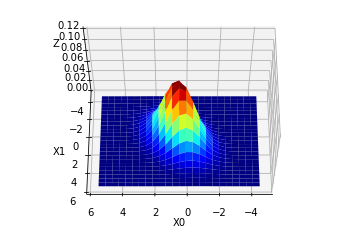

In [43]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X0grid,X1grid,Zgrid,cmap=cm.jet)
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("Z")
ax.view_init(60, 90)

### Contours in x0-x1 plane

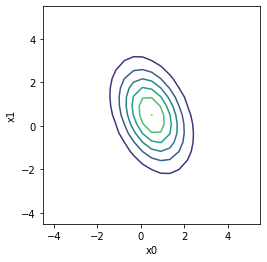

In [16]:
# plot contours of normal pdf in 2d based on surface plot
fig,ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
plt.contour(X0grid,X1grid,Zgrid)

### Create contour using SVD and Matplotlib Ellipse

In [21]:
# Create contour for C = 0.02
U,Sigma,Vt = np.linalg.svd(Cov)
print("Sigma: {}".format(Sigma))
contour = 0.02
alpha=np.sqrt(-2*np.log(contour*2*np.pi*np.sqrt(np.linalg.det(Cov))))
width = 2*alpha*np.sqrt(Sigma[0])
height = 2*alpha*np.sqrt(Sigma[1])
# compute angle - convert from radians to degrees
angle = np.arctan(U[1][0]/(U[0][0]+1e-10))*180/np.pi

Sigma: [2.20710678 0.79289322]


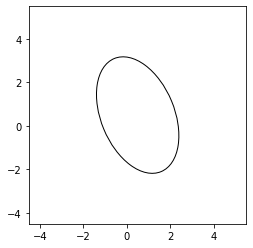

In [22]:
fig,ax  = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(x0min,x0max)
ax.set_ylim(x1min,x1max)
# use matplotlib Ellipse function to create ellipse object
ellipse = Ellipse(xy=np.squeeze(mean),width=width,height=height,angle=angle, fill=False)
ax.add_patch(ellipse)